In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# create set of random latitude and longitude combinations
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
# zip object packs each pair of lats and lngs of same index into a tuple
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# add latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# create list to hold cities
cities = []
# identify nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #if city is unique then add to cities list
    if city not in cities:
        cities.append(city)

#print city count to confirm sufficient count
len(cities)

607

In [5]:
import requests
requests.__version__

'2.25.1'

In [6]:
import requests
from config import weather_api_key
import time
from datetime import datetime

In [7]:
# starting url for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# loop through all cities in our list
for i, city in enumerate(cities):
    
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # log URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vestmannaeyjar
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | marathon
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | kingsport
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | tromso
Processing Record 11 of Set 1 | san quintin
Processing Record 12 of Set 1 | sitka
Processing Record 13 of Set 1 | oranjemund
Processing Record 14 of Set 1 | sinazongwe
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | necochea
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | victoria
Processing Record 20 of Set 1 | shingu
Processing Record 21 of Set 1 | puerto escondido
Processing Record 22 of Set 1 | lavrentiya
Processing Record 2

Processing Record 36 of Set 4 | ballina
Processing Record 37 of Set 4 | santa maria del oro
Processing Record 38 of Set 4 | irbit
Processing Record 39 of Set 4 | zhezkazgan
Processing Record 40 of Set 4 | avera
Processing Record 41 of Set 4 | balabac
Processing Record 42 of Set 4 | amderma
City not found. Skipping...
Processing Record 43 of Set 4 | cockburn town
Processing Record 44 of Set 4 | hastings
Processing Record 45 of Set 4 | doha
Processing Record 46 of Set 4 | sosnovo-ozerskoye
Processing Record 47 of Set 4 | port macquarie
Processing Record 48 of Set 4 | petrolina
Processing Record 49 of Set 4 | dolbeau
City not found. Skipping...
Processing Record 50 of Set 4 | liwale
Processing Record 1 of Set 5 | cabo san lucas
Processing Record 2 of Set 5 | leningradskiy
Processing Record 3 of Set 5 | sangmelima
Processing Record 4 of Set 5 | santa marinella
Processing Record 5 of Set 5 | iracoubo
Processing Record 6 of Set 5 | bathsheba
Processing Record 7 of Set 5 | coihaique
Processin

Processing Record 26 of Set 8 | kamaishi
Processing Record 27 of Set 8 | maun
Processing Record 28 of Set 8 | svetlyy
Processing Record 29 of Set 8 | siparia
Processing Record 30 of Set 8 | road town
Processing Record 31 of Set 8 | hofn
Processing Record 32 of Set 8 | sao joao da barra
Processing Record 33 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 34 of Set 8 | hutchinson
Processing Record 35 of Set 8 | clyde river
Processing Record 36 of Set 8 | tura
Processing Record 37 of Set 8 | aleksandrovsk
Processing Record 38 of Set 8 | xifeng
Processing Record 39 of Set 8 | omboue
Processing Record 40 of Set 8 | kruisfontein
Processing Record 41 of Set 8 | vilyuysk
Processing Record 42 of Set 8 | kaitangata
Processing Record 43 of Set 8 | dubinino
Processing Record 44 of Set 8 | mehamn
Processing Record 45 of Set 8 | taraz
Processing Record 46 of Set 8 | kedrovyy
Processing Record 47 of Set 8 | ossora
Processing Record 48 of Set 8 | hachinohe
Processing Record 49 of S

Processing Record 13 of Set 12 | sawtell
Processing Record 14 of Set 12 | belyy yar
Processing Record 15 of Set 12 | morondava
Processing Record 16 of Set 12 | broome
Processing Record 17 of Set 12 | pouso alegre
Processing Record 18 of Set 12 | chalon-sur-saone
Processing Record 19 of Set 12 | eenhana
Processing Record 20 of Set 12 | rungata
City not found. Skipping...
Processing Record 21 of Set 12 | kargasok
Processing Record 22 of Set 12 | dilla
Processing Record 23 of Set 12 | urumqi
Processing Record 24 of Set 12 | las margaritas
Processing Record 25 of Set 12 | zyryanka
Processing Record 26 of Set 12 | lata
Processing Record 27 of Set 12 | mangochi
Processing Record 28 of Set 12 | chunoyar
Processing Record 29 of Set 12 | eluru
Processing Record 30 of Set 12 | baoro
Processing Record 31 of Set 12 | pauini
Processing Record 32 of Set 12 | cookeville
Processing Record 33 of Set 12 | neokaisaria
City not found. Skipping...
Processing Record 34 of Set 12 | diffa
Processing Record 35

In [9]:
# convert array of dicts to DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vestmannaeyjar,63.4427,-20.2734,29.39,80,0,9.22,IS,2021-12-04 16:32:25
1,Mar Del Plata,-38.0023,-57.5575,60.82,81,75,11.99,AR,2021-12-04 16:31:30
2,Marathon,44.9000,-89.7668,32.20,62,1,1.01,US,2021-12-04 16:32:26
3,Barrow,71.2906,-156.7887,8.62,78,90,14.97,US,2021-12-04 16:30:02
4,Nikolskoye,59.7035,30.7861,19.02,95,100,4.99,RU,2021-12-04 16:32:26
5,Kingsport,36.5484,-82.5618,62.98,68,96,4.09,US,2021-12-04 16:32:26
6,Busselton,-33.6500,115.3333,62.10,74,0,12.50,AU,2021-12-04 16:32:27
7,Thompson,55.7435,-97.8558,-11.04,77,75,5.75,CA,2021-12-04 16:30:35
8,Ushuaia,-54.8000,-68.3000,58.66,31,40,14.97,AR,2021-12-04 16:32:27
9,Tromso,69.6496,18.9570,21.22,53,0,8.05,NO,2021-12-04 16:32:27


In [10]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vestmannaeyjar,IS,2021-12-04 16:32:25,63.4427,-20.2734,29.39,80,0,9.22
1,Mar Del Plata,AR,2021-12-04 16:31:30,-38.0023,-57.5575,60.82,81,75,11.99
2,Marathon,US,2021-12-04 16:32:26,44.9000,-89.7668,32.20,62,1,1.01
3,Barrow,US,2021-12-04 16:30:02,71.2906,-156.7887,8.62,78,90,14.97
4,Nikolskoye,RU,2021-12-04 16:32:26,59.7035,30.7861,19.02,95,100,4.99
5,Kingsport,US,2021-12-04 16:32:26,36.5484,-82.5618,62.98,68,96,4.09
6,Busselton,AU,2021-12-04 16:32:27,-33.6500,115.3333,62.10,74,0,12.50
7,Thompson,CA,2021-12-04 16:30:35,55.7435,-97.8558,-11.04,77,75,5.75
8,Ushuaia,AR,2021-12-04 16:32:27,-54.8000,-68.3000,58.66,31,40,14.97
9,Tromso,NO,2021-12-04 16:32:27,69.6496,18.9570,21.22,53,0,8.05


In [11]:
# create output file (CSV)
output_data_file = "weather_data/cities.csv"

# export city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [12]:
# get data for plotting city latitude vs max temperatures 
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

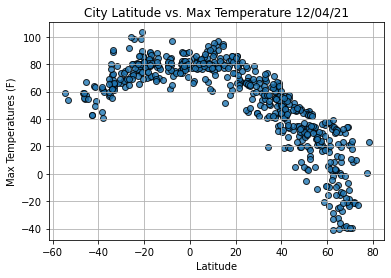

In [13]:
# import time
import time

# build scatter plot for latitude vs max temp
plt.scatter(lats,
            max_temps,
            edgecolor = 'black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# incorporate other graph properties
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Max Temperatures (F)')
plt.grid(True)

# save figure
plt.savefig('weather_data/Fig1.png')

# show plot
plt.show()

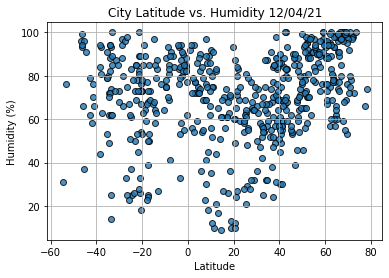

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

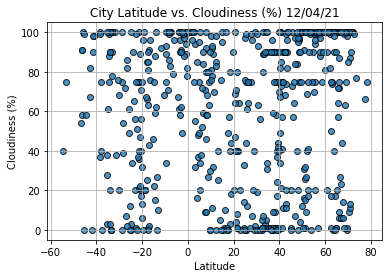

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

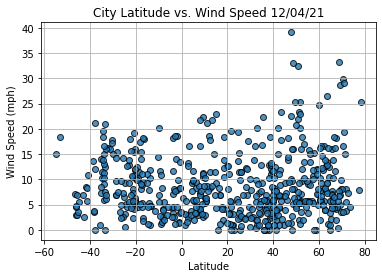

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# import linregress
from scipy.stats import linregress

# create function to perform linear regression (algorithm) and plot regression line and equation with the data
# algorithm will require 5 parameters that we define
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # run regression on hemisphere data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # calculate regression line from slope and intercept
    regress_values = x_values*slope + intercept
    
    # get equation of line 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    
    # create scatter plot and plot regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    
    # annotate text for the line equation 
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index_13 = city_data_df.loc[13]
index_13

City                   Sinazongwe
Country                        ZM
Date          2021-12-04 16:32:29
Lat                      -17.2614
Lng                       27.4618
Max Temp                    88.09
Humidity                       39
Cloudiness                      1
Wind Speed                   5.26
Name: 13, dtype: object

In [25]:
# create northern hemisphere dataframe
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# create southern hemisphere dataframe
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

r value for this regression is -0.8738344236352091


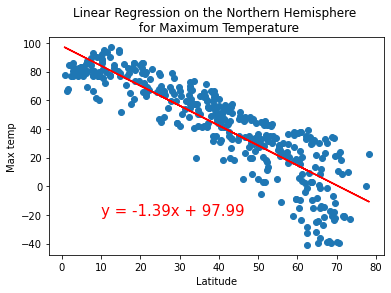

In [73]:
# define values for northern hemisphere scatter plot via function
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
print("r value for this regression is " + str(linregress(x_values,y_values).rvalue))

# call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max temp', (10,-20))

r value for this regression is 0.617839381005423


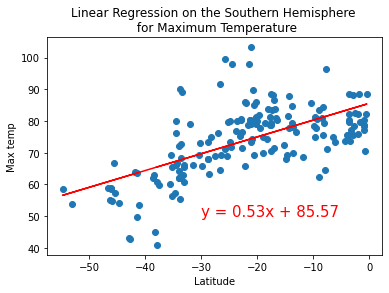

In [72]:
# define values for southern hemisphere scatter plot via function
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
print("r value for this regression is " + str(linregress(x_values,y_values).rvalue))

# call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max temp', (-30,50))

r value for this regression is 0.42512315205955825


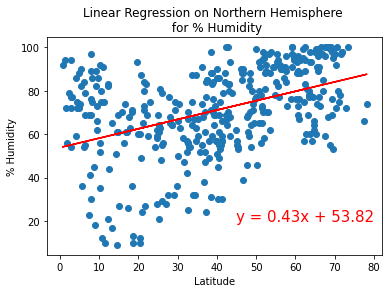

In [71]:
# plot lat vs % humidity scatter for northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
print("r value for this regression is " + str(linregress(x_values,y_values).rvalue))

plot_linear_regression(x_values, y_values, 'Linear Regression on Northern Hemisphere \n for % Humidity', '% Humidity', (45,20))

r value for this regression is 0.04435945448501362


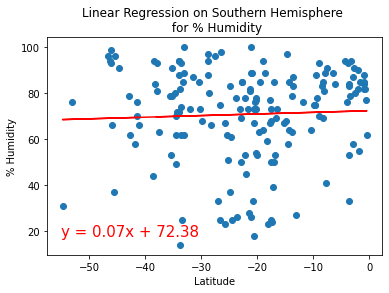

In [70]:
# plot lat vs % humidity scatter for southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
print("r value for this regression is " + str(linregress(x_values,y_values).rvalue))

plot_linear_regression(x_values, y_values, 'Linear Regression on Southern Hemisphere \n for % Humidity', '% Humidity', (-55,18))

r value for this regression is 0.16143058564840904


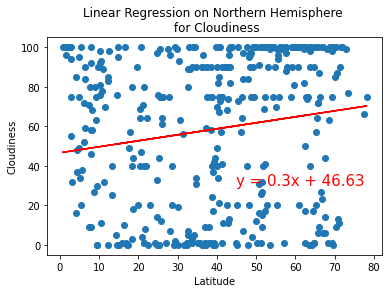

In [69]:
# plot lat vs cloudiness scatter for northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
print("r value for this regression is " + str(linregress(x_values,y_values).rvalue))
plot_linear_regression(x_values, y_values, 'Linear Regression on Northern Hemisphere \n for Cloudiness', 'Cloudiness', (45,30))

r value for this regression is 0.18897218045803305


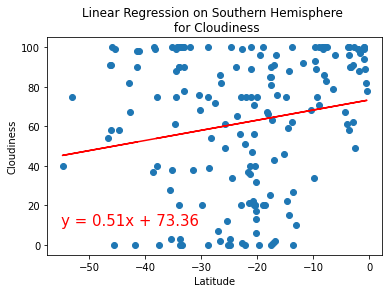

In [75]:
# plot lat vs cloudiness scatter for southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
print("r value for this regression is " + str(linregress(x_values,y_values).rvalue))

plot_linear_regression(x_values, y_values, 'Linear Regression on Southern Hemisphere \n for Cloudiness', 'Cloudiness', (-55,10))

r value for this regression is 0.15502750223496534


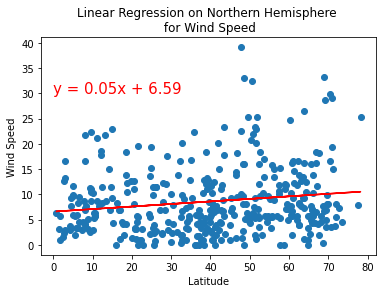

In [77]:
# plot lat vs wind speed scatter for northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
print("r value for this regression is " + str(linregress(x_values,y_values).rvalue))
plot_linear_regression(x_values, y_values, 'Linear Regression on Northern Hemisphere \n for Wind Speed', 'Wind Speed', (0,30))

r value for this regression is -0.15094670429198126


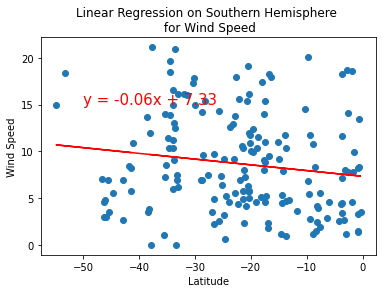

In [79]:
# plot lat vs wind speed scatter for southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
print("r value for this regression is " + str(linregress(x_values,y_values).rvalue))
plot_linear_regression(x_values, y_values, 'Linear Regression on Southern Hemisphere \n for Wind Speed', 'Wind Speed', (-50,15))